## Introduction

This is a jupyter notebook adapting the R code from the Lab 2.3 from chapter 2 of Introduction to Statistical Learning

Some of the resources used:

https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f

https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/

And of course:

Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. An Introduction to Statistical Learning : with Applications in R. New York :Springer, 2013.

In [46]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# 2.3.1: Basic commands

In [47]:
x = [1,3,2,5]
x

[1, 3, 2, 5]

In [48]:
x = np.array([1, 6, 2])
y = np.array([1, 4, 3])

In [49]:
x + y

array([ 2, 10,  5])

In [50]:
# equivalent function of R's ls() -> dir()
dir()

['A',
 'CS',
 'In',
 'Out',
 '_',
 '_13',
 '_22',
 '_24',
 '_26',
 '_27',
 '_28',
 '_3',
 '_31',
 '_34',
 '_35',
 '_36',
 '_37',
 '_38',
 '_39',
 '_40',
 '_41',
 '_43',
 '_44',
 '_47',
 '_49',
 '_5',
 '_6',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'auto',
 'cols',
 'exit',
 'f',
 'get_ipython',
 'math',
 'mean',
 'np',
 'pd',
 'plt',
 'quit',
 'rng',
 'rows',
 'sns',
 'std',
 'variance',
 'x',
 'y']

In [51]:
# Defining matrices without numpy
rows, cols = (5,4)
x = [[0 for j in range(cols)] for i in range(rows)]
print(f'MATRIX WITHOUT NUMPY \n{x}\n\n')

# Defining matrices with numpy -> arange and reshape
y = np.arange(20).reshape(5,4)


print(f'2D ARRAY NUMPY:\n{y}"')

MATRIX WITHOUT NUMPY 
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


2D ARRAY NUMPY:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]"


In [52]:
# performing operations on a matrix
print(pow(y,2), '\n')
print(2 * y)


[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]
 [144 169 196 225]
 [256 289 324 361]] 

[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]
 [24 26 28 30]
 [32 34 36 38]]


In [53]:
# Defining a random normal vector: Mean = 0, standard deviation = 1, output form: 5x5 2d Array
x = np.random.normal(loc = 0, scale = 1, size = (5, 5))
print(x)

[[-0.71652769 -0.38792999 -2.40507443  0.44150245  0.43045242]
 [-0.88209488  1.68726578  0.99927274  0.02555529 -1.28445107]
 [-0.42062073  0.2411335   0.80197881 -0.18311936  1.12545835]
 [-1.16712404  0.11875    -0.71326992  0.03757425 -0.56068183]
 [ 0.41330341  1.54379299  0.26889845 -1.41343222  0.34213165]]


In [54]:
# Reproducing other results: Setting a global seed (legacy) vs creating a specific random number generator for each task.

# legacy (not recommended)
np.random.seed(2021)
print("random.seed():")
print(np.random.normal(loc = 0, scale = 1, size = 5))
print()
# New best practice:
rng = np.random.default_rng(2021)   # Notice that this produces different results when compared to old random.seed.
print("default_rng():")
print(rng.normal(loc = 0, scale = 1, size = 5))
print()

# In order to reproduce results obtained using the legacy method, use RandomState
rng = np.random.RandomState(2021)
print("RandomState():")
print(rng.normal(loc = 0, scale = 1, size = 5))  # results are the same when compared to the .seed()

random.seed():
[ 1.48860905  0.67601087 -0.41845137 -0.80652081  0.55587583]

default_rng():
[-0.0688612  -0.68696559 -0.7884868   1.07600685 -0.01052417]

RandomState():
[ 1.48860905  0.67601087 -0.41845137 -0.80652081  0.55587583]


In [55]:
# Calculating mean, variance and standard deviation
#Mean
mean = np.mean(x)
#variance
variance = np.var(x)
#standard deviation
std = np.sqrt(variance)

print(f"Mean: {mean}, Variance: {variance}, Standard Deviation: {std}")

Mean: -0.06629024278390384, Variance: 0.8845245283528465, Standard Deviation: 0.9404916418304027


## 2.3.2: Graphics

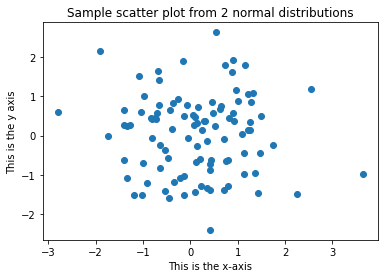

In [56]:
%matplotlib inline
x = np.random.normal(loc = 0, scale = 1, size = 100)
y = np.random.normal(loc = 0, scale = 1, size = 100)

# Plotting a scatter plot from x and y data
plt.scatter(x,y)
plt.xlabel('This is the x-axis')
plt.ylabel('This is the y axis')
plt.title('Sample scatter plot from 2 normal distributions')

# Saving graph to a file (must be called before plt.show())
plt.savefig('x_and_y.png')

# showing graph
plt.show()



In [57]:
# Creating a sequence of integers: np.arange(a, b)
np.arange(1,5)

array([1, 2, 3, 4])

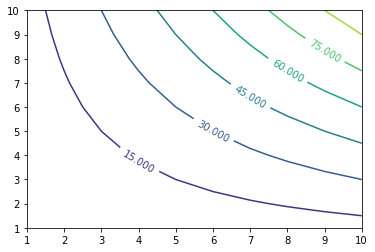

In [58]:
# Creating a contour plot
x = np.arange(1, 11)
y = x
f = np.outer(x,y)
CS = plt.contour(x, y, f)
plt.clabel(CS, inline = True)
plt.show()

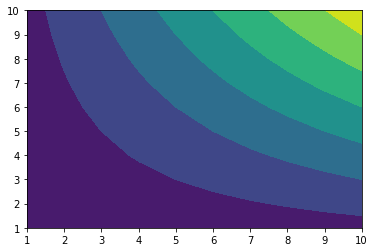

In [59]:
# plotting a heat map (Colored contour plot)
plt.contourf(x,y,f)
plt.show()

## 2.3.3 Indexing data

In [60]:
A = np.arange(1,17).reshape(4,4).transpose()
print(A)
print(A[1,2])

[[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]]
10


In [61]:
# Slicing arrays
print(A[:3, 1:4])

#Subsetting for values
print(A[A > 4])

[[ 5  9 13]
 [ 6 10 14]
 [ 7 11 15]]
[ 5  9 13  6 10 14  7 11 15  8 12 16]


## 2.3.4: Loading data
Using pandas dataframes

In [62]:
# Reading csv file
auto = pd.read_csv('Auto.csv', na_values = "?")
display(auto.head())
print(auto.info())
print(auto.shape)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB
None
(397, 9)


In [63]:
# Dropping rows with NA values
auto = auto.dropna()
display(auto)
print(auto.shape)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


(392, 9)


In [64]:
# variable (column) names
print(auto.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


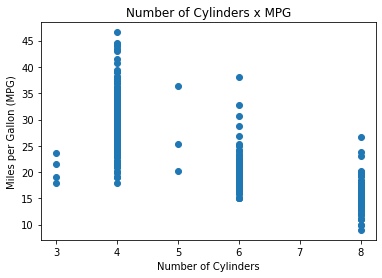

In [65]:
# Plotting some scatter plots
plt.scatter(auto.cylinders, auto.mpg)
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('Number of Cylinders x MPG')
plt.show()


In [66]:
# Changing type of cylinder column to categorical
auto.cylinders = auto.cylinders.astype('category')
auto.cylinders

0      8
1      8
2      8
3      8
4      8
      ..
392    4
393    4
394    4
395    4
396    4
Name: cylinders, Length: 392, dtype: category
Categories (5, int64): [3, 4, 5, 6, 8]

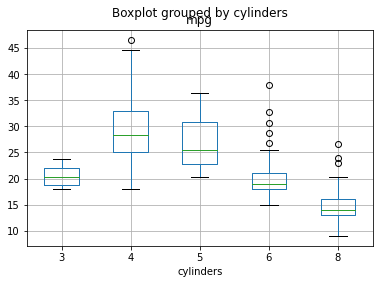

In [67]:
# Plotting boxplots now that cylinders is categorical
auto.boxplot(by = 'cylinders', column = ['mpg'])
plt.show()

(array([ 7., 45., 39., 52., 39., 40., 36., 39., 26., 27., 20., 12.,  4.,
         3.,  3.]),
 array([ 9.        , 11.50666667, 14.01333333, 16.52      , 19.02666667,
        21.53333333, 24.04      , 26.54666667, 29.05333333, 31.56      ,
        34.06666667, 36.57333333, 39.08      , 41.58666667, 44.09333333,
        46.6       ]),
 <BarContainer object of 15 artists>)

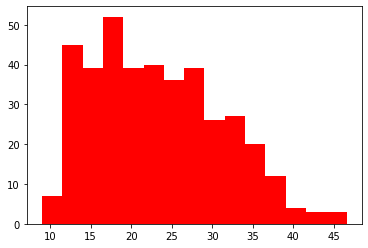

In [68]:
# Plotting histogram of MPG
plt.hist(auto.mpg, bins = 15, color = 'red')

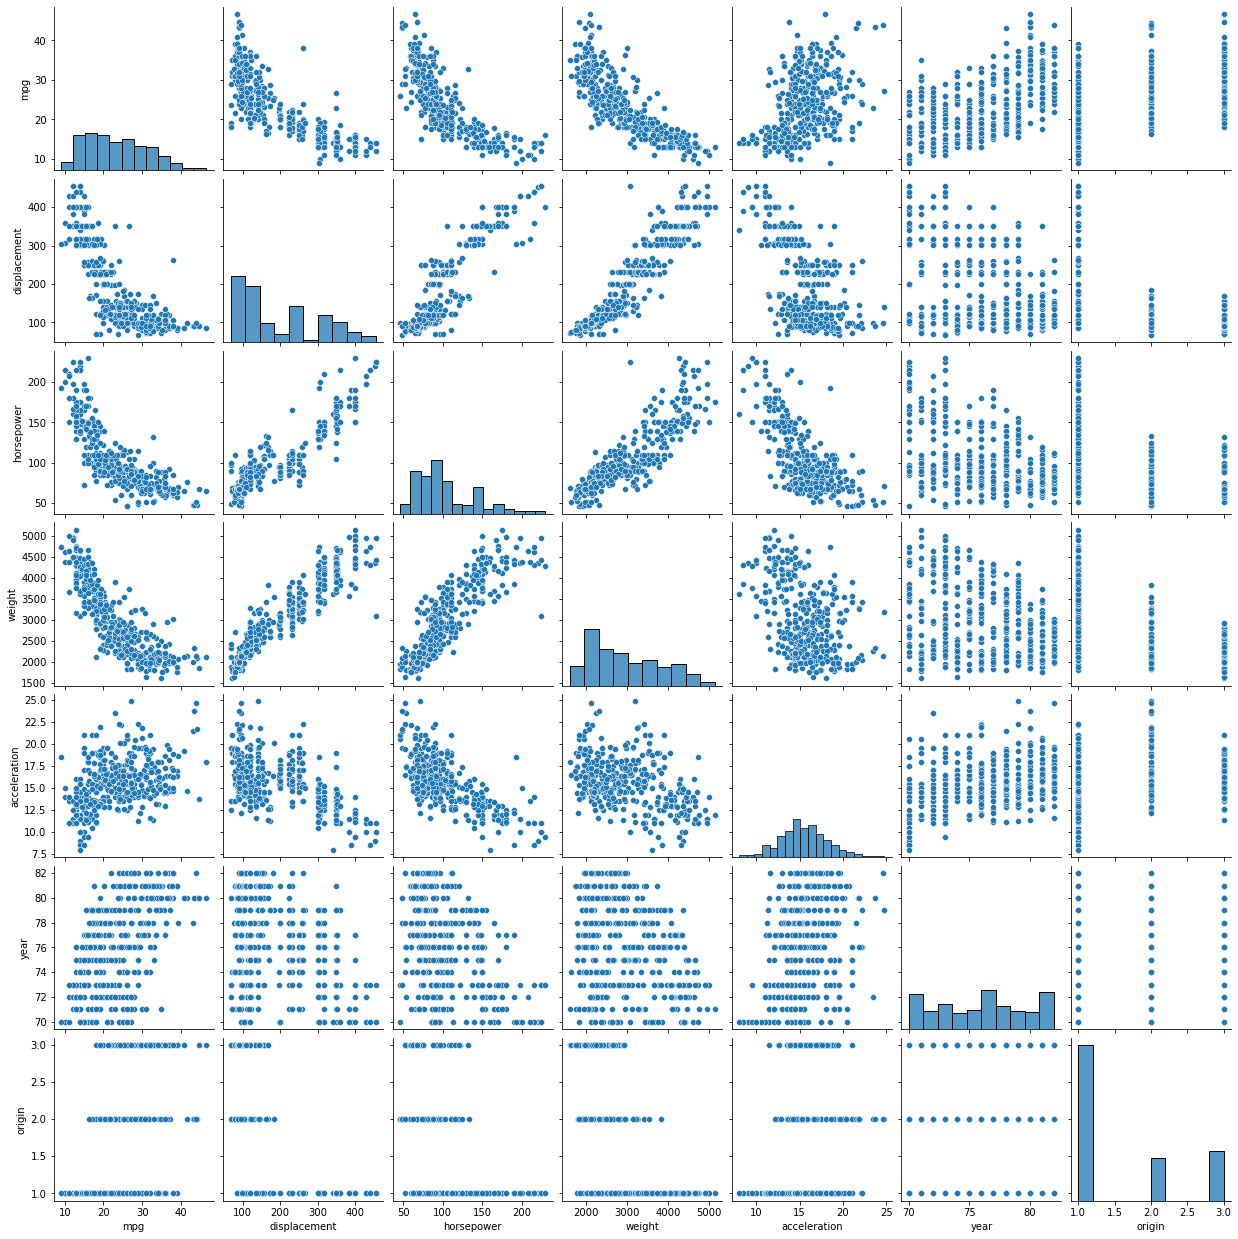

In [69]:
# Plotting pairplot()
sns.pairplot(auto)


In [70]:
# Data summary
display(auto.describe())
display(auto.mpg.describe())

,mpg,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64